# Import Packages

In [105]:
import os
import pickle
import numpy as np
import math as math
import pandas as pd
import random as random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.ensemble import RandomForestRegressor


### Import functions ###
from utils.Main import *
from utils.Selector import *
from utils.Auxiliary import *
from utils.Prediction import *

In [106]:
### Get Directory ###
cwd = os.getcwd()
ParentDirectory = os.path.abspath(os.path.join(cwd, ".."))

In [107]:
### Extract Error Vectors Function ###
def ExtractErrorVectorsFunction(DataType, SelectorType, ModelType):
    ### Set Up ###
    Directory = os.path.join(ParentDirectory, "Results", DataType, ModelType)
    AllErrorVectors = []

    ### Get Files ###
    for FileName in os.listdir(Directory):
        if SelectorType in FileName:
            FiledTargetDirectoryName = os.path.join(Directory, FileName)
            with open(FiledTargetDirectoryName) as pickle_file:
                NewRow = pd.read_csv(FiledTargetDirectoryName, index_col=0).iloc[:, 0].values
                AllErrorVectors.append(NewRow)

    AllErrorVectors = np.array(AllErrorVectors)
    return AllErrorVectors

In [108]:
### Input ###
DataType = "Simulate"
ModelType = "RidgeRegression/K5"

### Extract ###
SimulationErrorResultsPassive = ExtractErrorVectorsFunction(DataType = DataType, 
                                                            ModelType = ModelType, 
                                                            SelectorType = "Passive")
SimulationErrorResultsGSx = ExtractErrorVectorsFunction(DataType = DataType, 
                                                            ModelType = ModelType, 
                                                            SelectorType = "GSx")
SimulationErrorResultsGSy = ExtractErrorVectorsFunction(DataType = DataType, 
                                                            ModelType = ModelType, 
                                                            SelectorType = "GSy")
SimulationErrorResultsiGS = ExtractErrorVectorsFunction(DataType = DataType, 
                                                            ModelType = ModelType, 
                                                            SelectorType = "iGS")


In [109]:
print(SimulationErrorResultsPassive.shape)
print(SimulationErrorResultsGSx.shape)
print(SimulationErrorResultsGSy.shape)
print(SimulationErrorResultsiGS.shape)

(100, 640)
(100, 640)
(100, 640)
(100, 640)


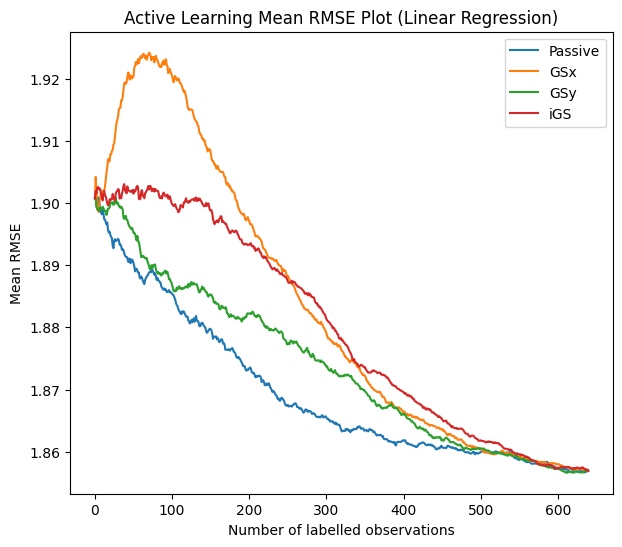

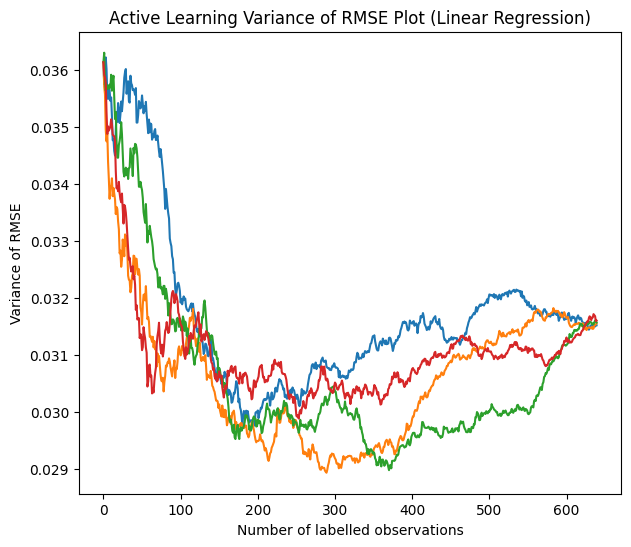

In [110]:

### Plot ###
MeanPlot, VariancePlot = MeanVariancePlot(Passive = SimulationErrorResultsPassive,
                                          GSx = SimulationErrorResultsGSx,
                                          GSy = SimulationErrorResultsGSy,
                                          iGS = SimulationErrorResultsiGS)

MeanPlot.savefig(os.path.join(ParentDirectory,"ResearchUpdates", "Nov13Updates", DataType, ModelType + "MeanPlot.png"))
VariancePlot.savefig(os.path.join(ParentDirectory,"ResearchUpdates", "Nov13Updates", DataType, ModelType + "VariancePlot.png"))